<a href="https://colab.research.google.com/github/shfrsalsa/TugasAkhir/blob/main/RBFNN_ANTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import package python
import numpy as np
import pandas as pd

# seaborn & matplotlib untuk plotting dan
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud

# preprocessing untuk memanipulasi data categorical
from sklearn.preprocessing import LabelEncoder
# standardscaler untuk melakukan normalisasi untuk meminimalkan error
from sklearn.preprocessing import StandardScaler
# train test split untuk membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import sys
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Cleaned_ANTM_JK_Data.csv'

data = pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:
data.head()

,Date,Close
0,2018-12-31,765.0
1,2019-01-01,765.0
2,2019-01-02,740.0
3,2019-01-03,750.0
4,2019-01-04,760.0


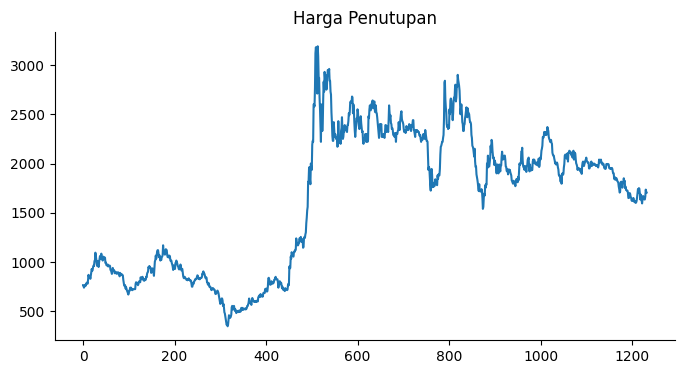

In [ ]:
# @title Close

from matplotlib import pyplot as plt
data['Close'].plot(kind='line', figsize=(8, 4), title='Harga Penutupan')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.shape

(1233, 2)

In [ ]:
# untuk melihat tipe data pada DataFrame
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1233 non-null   object 
 1   Close   1233 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.4+ KB


tidak ada missing value pada data tersebut karena tidak ada nilai yang hilang

In [ ]:
data.describe()

,Close
count,1233.000000
mean,1627.490673
std,705.918109
min,348.000000
25%,880.000000
50%,1850.000000
75%,2240.000000
max,3190.000000


In [ ]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract year from 'Date' column
data['Year'] = data['Date'].dt.year

# Group by 'Year' and calculate descriptive statistics for each year
annual_stats = data.groupby('Year')['Close'].describe()

annual_stats

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2018,1.0,765.000000,NaN,765.0,765.00,765.0,765.00,765.0
2019,258.0,900.523256,111.840881,670.0,820.00,895.0,988.75,1170.0
2020,242.0,791.760331,320.800335,348.0,586.25,720.0,840.00,2000.0
2021,247.0,2436.194332,202.251782,2170.0,2300.00,2370.0,2520.00,3190.0
2022,246.0,2101.585366,300.091698,1540.0,1896.25,2000.0,2297.50,2900.0
2023,239.0,1938.326360,180.442739,1595.0,1815.00,1970.0,2040.00,2370.0


In [ ]:
import pandas as pd

# Menghitung nilai minimum dan maksimum untuk setiap kolom
min_values = data[['Close']].min()
max_values = data[['Close']].max()

# Melakukan normalisasi data
normalized_data = (data[['Close']] - min_values) / (max_values - min_values)

# Menambahkan kembali kolom 'Date' sebagai indeks
normalized_data.index = data['Date']

# Menampilkan data yang sudah dinormalisasi dengan 'Date' sebagai indeks
print(normalized_data.head())


               Close
Date                
2018-12-31  0.146728
2019-01-01  0.146728
2019-01-02  0.137931
2019-01-03  0.141450
2019-01-04  0.144968


<Figure size 1000x600 with 0 Axes>

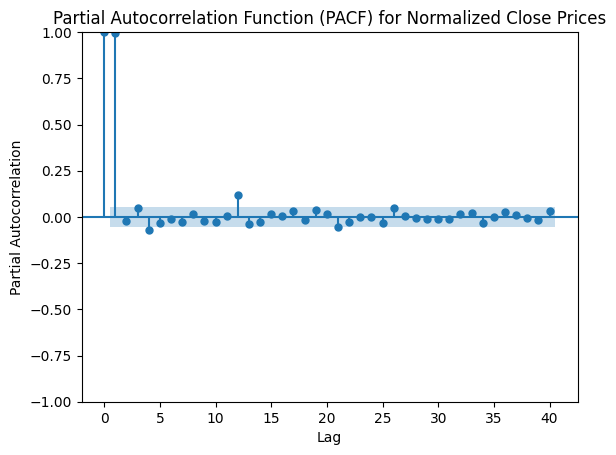

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Menambahkan kembali kolom 'Date' sebagai indeks
normalized_data.index = data['Date']

# Menggunakan harga penutupan yang telah dinormalisasi sebagai data pengamatan
close_prices = normalized_data['Close']

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(close_prices, lags=40, method='ywm', alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF) for Normalized Close Prices')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


Untuk membaca plot Partial Autocorrelation Function (PACF), Anda perlu memperhatikan beberapa hal utama:

Batang Vertikal (Bar): Setiap batang vertikal menunjukkan nilai autokorelasi parsial pada lag tertentu. Lag adalah jumlah periode waktu yang diundur.

Batas Signifikansi (Significance Bounds): Garis horizontal putus-putus (atau area bayangan) menunjukkan batas signifikansi, biasanya pada level kepercayaan 95%. Jika batang vertikal melampaui batas ini, nilai autokorelasi parsial tersebut dianggap signifikan.

Tinggi Batang: Tinggi batang menunjukkan kekuatan hubungan parsial antara data pada waktu tertentu dengan data pada lag tertentu, setelah menghilangkan efek lag-lag sebelumnya.
Untuk memastikan bahwa lag yang signifikan benar-benar signifikan, kita perlu melihat apakah batangnya melewati batas signifikan (garis horizontal biru) yang menunjukkan nilai autokorelasi parsial yang signifikan.

Lag 1: Jelas signifikan karena batangnya jauh di atas batas signifikan.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Menambahkan kembali kolom 'Date' sebagai indeks
normalized_data.index = data['Date']

# Menyiapkan data untuk training dan testing
# Menggunakan lag 1 sebagai fitur input
normalized_data['Lag1'] = normalized_data['Close'].shift(1)

# Menghapus baris dengan nilai NaN akibat pergeseran (shift)
data_with_lags = normalized_data.dropna()

# Menentukan fitur dan target
X = data_with_lags[['Lag1']]
y = data_with_lags['Close']

# Membagi data menjadi data training (80%) dan data testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())



                Lag1
Date                
2023-05-02  0.616467
2022-08-22  0.602393
2020-09-09  0.167840
2023-12-22  0.452850
2022-04-06  0.817030
Date
2023-05-02    0.602393
2022-08-22    0.576003
2020-09-09    0.157284
2023-12-22    0.463406
2022-04-06    0.809993
Name: Close, dtype: float64
                Lag1
Date                
2021-03-16  0.700915
2023-03-27  0.544335
2019-12-09  0.162562
2021-03-22  0.669247
2023-09-25  0.528501
Date
2021-03-16    0.676284
2023-03-27    0.567206
2019-12-09    0.167840
2021-03-22    0.672766
2023-09-25    0.528501
Name: Close, dtype: float64


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Function to apply K-Means clustering and return centers and standard deviations
def kmeans_clustering(X_train, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_
    std_devs = np.sqrt(kmeans.transform(X_train).var(axis=0))
    return centers, std_devs

# Dictionary to store the results
results = {}

# Applying K-Means clustering for models (1-2-1) to (1-10-1)
for n_clusters in range(2, 11):
    centers, std_devs = kmeans_clustering(X_train, n_clusters)
    results[f'1-{n_clusters}-1'] = {
        'centers': centers,
        'std_devs': std_devs
    }

results


{'1-2-1': {'centers': array([[0.17001406],
         [0.63697403]]),
  'std_devs': array([0.22071992, 0.19449812])},
 '1-3-1': {'centers': array([[0.16893879],
         [0.73703274],
         [0.55190115]]),
  'std_devs': array([0.22121768, 0.22881582, 0.15704801])},
 '1-4-1': {'centers': array([[0.12594228],
         [0.55297413],
         [0.23799405],
         [0.73703274]]),
  'std_devs': array([0.23569258, 0.15765291, 0.18072265, 0.22881582])},
 '1-5-1': {'centers': array([[0.23727044],
         [0.69001839],
         [0.54591067],
         [0.12546389],
         [0.82642763]]),
  'std_devs': array([0.18119469, 0.21630029, 0.15370508, 0.23579534, 0.24135469])},
 '1-6-1': {'centers': array([[0.12546389],
         [0.70158827],
         [0.49027573],
         [0.83917705],
         [0.2354298 ],
         [0.5818311 ]]),
  'std_devs': array([0.23579534, 0.22006538, 0.12404532, 0.24240504, 0.18239812,
         0.17241809])},
 '1-7-1': {'centers': array([[0.70158827],
         [0.161531

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Function to create and train a neural network model
def train_nn_model(X_train, y_train, hidden_layer_sizes):
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    return model

# Dictionary to store the MSE results
mse_results = {}

# List of hidden layer sizes based on the clustering models
hidden_layer_sizes_list = [(2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,)]

# Train and evaluate models
for hidden_layer_sizes in hidden_layer_sizes_list:
    model_name = f"1-{hidden_layer_sizes[0]}-1"
    model = train_nn_model(X_train, y_train, hidden_layer_sizes)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate MSE for training and testing data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Store the results
    mse_results[model_name] = {'mse_train': mse_train, 'mse_test': mse_test}
print(mse_results)


{'1-2-1': {'mse_train': 0.053757012300092256, 'mse_test': 0.05167237583422709}, '1-3-1': {'mse_train': 0.002864068137327025, 'mse_test': 0.002964110849646699}, '1-4-1': {'mse_train': 0.01118085211823614, 'mse_test': 0.012352440491654789}, '1-5-1': {'mse_train': 0.004088377388196216, 'mse_test': 0.004039259943149609}, '1-6-1': {'mse_train': 0.07181196193911114, 'mse_test': 0.07281832458722359}, '1-7-1': {'mse_train': 0.02827274973158992, 'mse_test': 0.027742998599840914}, '1-8-1': {'mse_train': 0.004300530003524051, 'mse_test': 0.0037916431346270707}, '1-9-1': {'mse_train': 0.007978161257244315, 'mse_test': 0.007928602590887011}, '1-10-1': {'mse_train': 0.026359424123435577, 'mse_test': 0.026617850912969906}}


In [ ]:
# Find the model with the smallest MSE for training and testing
best_model_name = min(mse_results, key=lambda k: mse_results[k]['mse_train'] + mse_results[k]['mse_test'])
best_mse_train = mse_results[best_model_name]['mse_train']
best_mse_test = mse_results[best_model_name]['mse_test']

best_model_name, best_mse_train, best_mse_test

('1-3-1', 0.002864068137327025, 0.002964110849646699)

In [ ]:
# Re-apply K-Means clustering with 6 clusters on X_train only
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
train_cluster_labels = kmeans.predict(X_train)

# Assign the training cluster labels to the corresponding indices in the full dataset
data_with_lags['Cluster'] = kmeans.predict(X)

# Display the data with cluster labels for the full dataset
data_with_lags_clustered = data_with_lags[['Close', 'Lag1', 'Cluster']]
data_with_lags_clustered.reset_index(inplace=True)
data_with_lags_clustered.set_index('Date', inplace=True)

data_with_lags_clustered



,Close,Lag1,Cluster
Date,,,
2019-01-01,0.146728,0.146728,0
2019-01-02,0.137931,0.146728,0
2019-01-03,0.141450,0.137931,0
2019-01-04,0.144968,0.141450,0
2019-01-07,0.148487,0.144968,0
...,...,...,...
2023-12-21,0.452850,0.452850,2
2023-12-22,0.463406,0.452850,2
2023-12-27,0.488037,0.463406,2


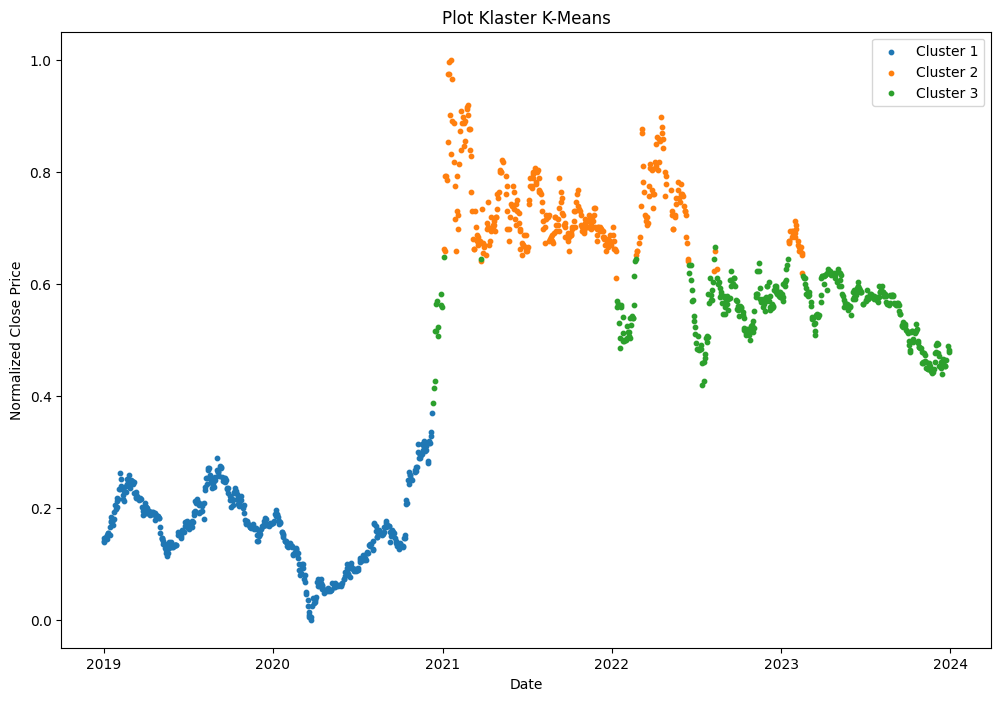

In [ ]:
# Scatter plot to visualize clusters with cluster names from 1 to 3
plt.figure(figsize=(12, 8))

# Plot each cluster with a different color
for cluster in range(3):
    cluster_data = data_with_lags_clustered[data_with_lags_clustered['Cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['Close'], label=f'Cluster {cluster + 1}', s=10)

plt.title('Plot Klaster K-Means')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.show()


In [ ]:
# Mengambil best_centers dan best_std_devs dari hasil clustering
best_centers = results[best_model_name]['centers']
best_std_devs = results[best_model_name]['std_devs']

# Mendefinisikan kembali fungsi untuk menghitung nilai aktivasi menggunakan fungsi Gaussian untuk setiap pusat
def calculate_activation_for_each_center(X, centers, std_devs):
    activations = []
    for center, std_dev in zip(centers, std_devs):
        activation = np.exp(-((X - center) ** 2) / (2 * std_dev ** 2))
        activations.append(activation)
    return np.column_stack(activations)

# Pastikan hanya menggunakan nilai fitur (bukan indeks 'Date')
X_train_values = X_train['Lag1'].to_numpy().reshape(-1, 1)

# Menghitung nilai aktivasi untuk data training menggunakan pusat dan simpangan baku dari model terbaik
activations = calculate_activation_for_each_center(X_train_values, best_centers, best_std_devs)

# Membuat DataFrame untuk menampilkan nilai aktivasi dengan indeks 'Date'
activations_df = pd.DataFrame(activations, columns=[f'Activation_{i+1}' for i in range(len(best_centers))], index=X_train.index)

# Menampilkan beberapa baris pertama dari DataFrame dengan indeks 'Date'
activations_df.head()



,Activation_1,Activation_2,Activation_3
Date,,,
2023-05-02,0.129211,0.870387,0.918961
2022-08-22,0.146662,0.841037,0.949630
2020-09-09,0.999988,0.045321,0.050275
2023-12-22,0.438866,0.462436,0.819636
2022-04-06,0.013685,0.940715,0.240504


In [ ]:
# Extract the centers and standard deviations for the best model
best_centers = results[best_model_name]['centers']
best_std_devs = results[best_model_name]['std_devs']

# Redefine the function to calculate the activation values using the Gaussian function for each center
def calculate_activation_for_each_center(X, centers, std_devs):
    activations = []
    for center, std_dev in zip(centers, std_devs):
        activation = np.exp(-((X - center) ** 2) / (2 * std_dev ** 2))
        activations.append(activation)
    return np.column_stack(activations)

# Calculate activation values for the training data using the best model's centers and std devs
activations = calculate_activation_for_each_center(X_train.to_numpy(), best_centers, best_std_devs)

# Creating a DataFrame to display the activations
activations_df = pd.DataFrame(activations, columns=[f'Activation_{i+1}' for i in range(len(best_centers))])

print(activations_df)


     Activation_1  Activation_2  Activation_3
0        0.129211      0.870387      0.918961
1        0.146662      0.841037      0.949630
2        0.999988      0.045321      0.050275
3        0.438866      0.462436      0.819636
4        0.013685      0.940715      0.240504
..            ...           ...           ...
980      0.291711      0.627645      0.974472
981      0.189408      0.772151      0.991448
982      0.170852      0.801462      0.978298
983      0.240181      0.696899      0.998239
984      0.197777      0.759247      0.995263

[985 rows x 3 columns]


In [ ]:
# Menghitung matriks Gaussian berdasarkan aktivasi yang sudah dihitung
gaussian_matrix = activations_df.to_numpy()

# Membuat DataFrame untuk matriks Gaussian
gaussian_matrix_df = pd.DataFrame(gaussian_matrix, columns=[f'Gaussian_{i+1}' for i in range(gaussian_matrix.shape[1])])

# Menampilkan beberapa baris pertama dari matriks Gaussian
print(gaussian_matrix)


[[0.12921064 0.87038698 0.9189613 ]
 [0.14666211 0.84103693 0.94963047]
 [0.99998765 0.04532128 0.05027506]
 ...
 [0.1708521  0.80146156 0.97829818]
 [0.24018111 0.69689888 0.99823857]
 [0.19777702 0.75924661 0.99526256]]


In [ ]:
# Menambahkan satu kolom bernilai 1 sebagai bobot bias pada matriks Gaussian
gaussian_matrix_with_bias = np.hstack([gaussian_matrix, np.ones((gaussian_matrix.shape[0], 1))])

# Membuat DataFrame untuk matriks Gaussian dengan bobot bias
gaussian_matrix_with_bias_df = pd.DataFrame(gaussian_matrix_with_bias, columns=[f'Gaussian_{i+1}' for i in range(gaussian_matrix.shape[1])] + ['Bias'])

gaussian_matrix_with_bias_df.head()

,Gaussian_1,Gaussian_2,Gaussian_3,Bias
0,0.129211,0.870387,0.918961,1.0
1,0.146662,0.841037,0.949630,1.0
2,0.999988,0.045321,0.050275,1.0
3,0.438866,0.462436,0.819636,1.0
4,0.013685,0.940715,0.240504,1.0


In [ ]:
# Menghitung nilai bobot dan bobot bias
Phi = gaussian_matrix_with_bias
y = y_train.to_numpy()

# Menghitung bobot menggunakan persamaan di atas
Phi_T = Phi.T
Phi_T_Phi = np.dot(Phi_T, Phi)
Phi_T_Phi_inv = np.linalg.inv(Phi_T_Phi)
Phi_T_y = np.dot(Phi_T, y)
w = np.dot(Phi_T_Phi_inv, Phi_T_y)

w


array([-0.44139949,  0.23725524, -0.1123696 ,  0.58966589])

In [ ]:
# Mengambil best_centers dan best_std_devs dari hasil clustering
best_centers = results[best_model_name]['centers']
best_std_devs = results[best_model_name]['std_devs']

# Mendefinisikan kembali fungsi untuk menghitung nilai aktivasi menggunakan fungsi Gaussian untuk setiap pusat
def calculate_activation_for_each_center(X, centers, std_devs):
    activations = []
    for center, std_dev in zip(centers, std_devs):
        activation = np.exp(-((X - center) ** 2) / (2 * std_dev ** 2))
        activations.append(activation)
    return np.column_stack(activations)

# Pastikan hanya menggunakan nilai fitur (bukan indeks 'Date')
X_train_values = X_train['Lag1'].to_numpy().reshape(-1, 1)

# Menghitung nilai aktivasi untuk data training menggunakan pusat dan simpangan baku dari model terbaik
activations = calculate_activation_for_each_center(X_train_values, best_centers, best_std_devs)

# Membuat DataFrame untuk menampilkan nilai aktivasi dengan indeks 'Date'
activations_df = pd.DataFrame(activations, columns=[f'Activation_{i+1}' for i in range(len(best_centers))], index=X_train.index)

# Menggunakan nilai bobot yang telah dihitung sebelumnya
weights = w[:-1]  # Bobot untuk Gaussian_1, Gaussian_2, Gaussian_3
bias_weight = w[-1]  # Bobot bias

# Menghitung nilai output jaringan untuk data training
gaussian_matrix = activations_df.to_numpy()
y_pred = np.dot(gaussian_matrix, weights) + bias_weight

# Membuat DataFrame untuk hasil prediksi dengan indeks 'Date'
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted'], index=X_train.index)

# Menampilkan lima nilai prediksi pertama dengan indeks 'Date'
print(y_pred_df[:10])


            Predicted
Date                 
2023-05-02   0.635873
2022-08-22   0.617760
2020-09-09   0.153375
2023-12-22   0.413564
2022-04-06   0.779789
2020-01-03   0.153600
2021-02-26   0.753846
2022-02-04   0.512488
2021-11-26   0.753935
2020-03-12   0.194585


In [ ]:
# Menggunakan nilai bobot yang telah dihitung sebelumnya
weights = w[:-1]  # Bobot untuk Gaussian_1, Gaussian_2, Gaussian_3
bias_weight = w[-1]  # Bobot bias

# Menghitung nilai output jaringan untuk data training
y_pred = np.dot(gaussian_matrix, weights) + bias_weight

# Menampilkan hasil prediksi
y_pred[:10]  # Menampilkan 10 nilai prediksi pertama


array([0.63587293, 0.61776013, 0.15337517, 0.4135639 , 0.77978933,
       0.1536    , 0.75384616, 0.51248788, 0.75393518, 0.19458491])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Menghitung nilai aktivasi untuk data testing menggunakan pusat dan simpangan baku dari model terbaik
X_test_values = X_test['Lag1'].to_numpy().reshape(-1, 1)
activations_test = calculate_activation_for_each_center(X_test_values, best_centers, best_std_devs)

# Menambahkan satu kolom bernilai 1 sebagai bobot bias pada matriks Gaussian untuk data testing
gaussian_matrix_test_with_bias = np.hstack([activations_test, np.ones((activations_test.shape[0], 1))])

# Menghitung nilai output jaringan untuk data testing
y_test_pred = np.dot(gaussian_matrix_test_with_bias, np.append(weights, bias_weight))

# Denormalisasi y_test dan y_test_pred
min_close = min_values['Close']
max_close = max_values['Close']

def denormalize(normalized_value, min_value, max_value):
    return normalized_value * (max_value - min_value) + min_value

y_test_denormalized = denormalize(y_test.to_numpy(), min_close, max_close)
y_test_pred_denormalized = denormalize(y_test_pred, min_close, max_close)


In [ ]:
# Menghitung prediksi pada data training menggunakan bobot yang telah dihitung
y_train_pred = np.dot(Phi, w)

# Menghitung Mean Squared Error (MSE) untuk data training
mse_train = mean_squared_error(y_train, y_train_pred)
mse_train


0.003178999522029387

In [ ]:
# Menghitung nilai aktivasi untuk data testing menggunakan pusat dan simpangan baku dari model terbaik
X_test_values = X_test.to_numpy()
activations_test = calculate_activation_for_each_center(X_test_values, best_centers, best_std_devs)

# Menambahkan satu kolom bernilai 1 sebagai bobot bias pada matriks Gaussian untuk data testing
gaussian_matrix_with_bias_test = np.hstack([activations_test, np.ones((activations_test.shape[0], 1))])

# Menghitung prediksi pada data testing menggunakan bobot yang telah dihitung
y_test_pred = np.dot(gaussian_matrix_with_bias_test, w)

# Menghitung Mean Squared Error (MSE) untuk data testing
mse_test = mean_squared_error(y_test, y_test_pred)
mse_test


0.00279273801862497

MAPE untuk data testing setelah denormalisasi: 0.11573161425717413


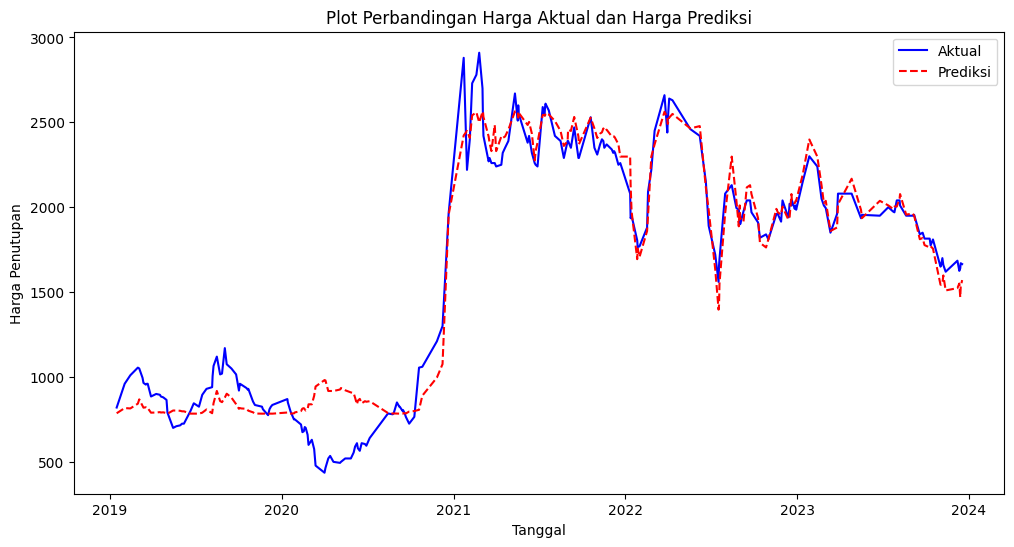

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Menghitung nilai aktivasi untuk data testing menggunakan pusat dan simpangan baku dari model terbaik
X_test_values = X_test['Lag1'].to_numpy().reshape(-1, 1)
activations_test = calculate_activation_for_each_center(X_test_values, best_centers, best_std_devs)

# Menambahkan satu kolom bernilai 1 sebagai bobot bias pada matriks Gaussian untuk data testing
gaussian_matrix_test_with_bias = np.hstack([activations_test, np.ones((activations_test.shape[0], 1))])

# Menghitung nilai output jaringan untuk data testing
y_test_pred = np.dot(gaussian_matrix_test_with_bias, np.append(weights, bias_weight))

# Denormalisasi y_test dan y_test_pred
min_close = min_values['Close']
max_close = max_values['Close']

def denormalize(normalized_value, min_value, max_value):
    return normalized_value * (max_value - min_value) + min_value

y_test_denormalized = denormalize(y_test.to_numpy(), min_close, max_close)
y_test_pred_denormalized = denormalize(y_test_pred, min_close, max_close)

# Menghitung MAPE untuk data testing setelah denormalisasi
mape_test_denormalized = mean_absolute_percentage_error(y_test_denormalized, y_test_pred_denormalized)
print(f"MAPE untuk data testing setelah denormalisasi: {mape_test_denormalized}")

# Membuat DataFrame untuk memudahkan pengurutan berdasarkan tanggal
result_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual': y_test_denormalized,
    'Predicted': y_test_pred_denormalized
})

# Mengurutkan DataFrame berdasarkan tanggal
result_df = result_df.sort_values(by='Date')

# Membuat plot perbandingan antara nilai aktual dan nilai prediksi berdasarkan runtut waktu
plt.figure(figsize=(12, 6))
plt.plot(result_df['Date'], result_df['Actual'], label='Aktual', color='blue')
plt.plot(result_df['Date'], result_df['Predicted'], label='Prediksi', linestyle='--', color='red')
plt.title('Plot Perbandingan Harga Aktual dan Harga Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()


MAPE untuk data testing setelah denormalisasi: 0.11573161425717413


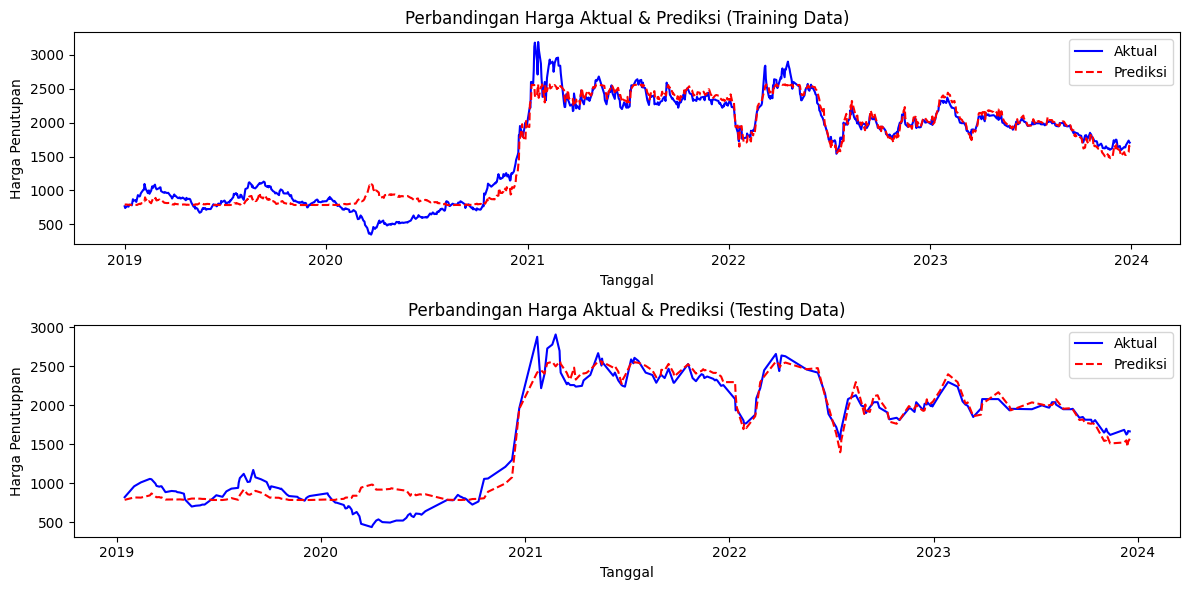

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Menghitung nilai aktivasi untuk data training menggunakan pusat dan simpangan baku dari model terbaik
X_train_values = X_train['Lag1'].to_numpy().reshape(-1, 1)
activations_train = calculate_activation_for_each_center(X_train_values, best_centers, best_std_devs)

# Menghitung nilai aktivasi untuk data testing menggunakan pusat dan simpangan baku dari model terbaik
X_test_values = X_test['Lag1'].to_numpy().reshape(-1, 1)
activations_test = calculate_activation_for_each_center(X_test_values, best_centers, best_std_devs)

# Menambahkan satu kolom bernilai 1 sebagai bobot bias pada matriks Gaussian untuk data training dan testing
gaussian_matrix_train_with_bias = np.hstack([activations_train, np.ones((activations_train.shape[0], 1))])
gaussian_matrix_test_with_bias = np.hstack([activations_test, np.ones((activations_test.shape[0], 1))])

# Menghitung nilai output jaringan untuk data training dan testing
y_train_pred = np.dot(gaussian_matrix_train_with_bias, np.append(weights, bias_weight))
y_test_pred = np.dot(gaussian_matrix_test_with_bias, np.append(weights, bias_weight))

# Denormalisasi y_train, y_train_pred, y_test, dan y_test_pred
min_close = min_values['Close']
max_close = max_values['Close']

def denormalize(normalized_value, min_value, max_value):
    return normalized_value * (max_value - min_value) + min_value

y_train_denormalized = denormalize(y_train.to_numpy(), min_close, max_close)
y_train_pred_denormalized = denormalize(y_train_pred, min_close, max_close)
y_test_denormalized = denormalize(y_test.to_numpy(), min_close, max_close)
y_test_pred_denormalized = denormalize(y_test_pred, min_close, max_close)

# Menghitung MAPE untuk data testing setelah denormalisasi
mape_test_denormalized = mean_absolute_percentage_error(y_test_denormalized, y_test_pred_denormalized)
print(f"MAPE untuk data testing setelah denormalisasi: {mape_test_denormalized}")

# Membuat DataFrame untuk memudahkan pengurutan berdasarkan tanggal
train_df = pd.DataFrame({
    'Date': y_train.index,
    'Actual': y_train_denormalized,
    'Predicted': y_train_pred_denormalized
})

test_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual': y_test_denormalized,
    'Predicted': y_test_pred_denormalized
})

# Mengurutkan DataFrame berdasarkan tanggal
train_df = train_df.sort_values(by='Date')
test_df = test_df.sort_values(by='Date')

# Membuat plot perbandingan antara nilai aktual dan nilai prediksi berdasarkan runtut waktu untuk data training dan testing
plt.figure(figsize=(12, 6))

# Plot untuk data training
plt.subplot(2, 1, 1)
plt.plot(train_df['Date'], train_df['Actual'], label='Aktual', color='blue')
plt.plot(train_df['Date'], train_df['Predicted'], label='Prediksi', linestyle='--', color='red')
plt.title('Perbandingan Harga Aktual & Prediksi (Training Data)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()

# Plot untuk data testing
plt.subplot(2, 1, 2)
plt.plot(test_df['Date'], test_df['Actual'], label='Aktual', color='blue')
plt.plot(test_df['Date'], test_df['Predicted'], label='Prediksi', linestyle='--', color='red')
plt.title('Perbandingan Harga Aktual & Prediksi (Testing Data)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutuppan')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
y_max = data['Close'].max()
y_min = data['Close'].min()
print(y_max)
print(y_min)

3190.0
348.0


In [ ]:
# Maximum and minimum values from the original data
y_max = data['Close'].max()
y_min = data['Close'].min()

# Denormalizing the predicted values
F_t = y_pred * (y_max - y_min) + y_min

# Convert the denormalized predictions to a DataFrame for better readability
denormalized_predictions_df = pd.DataFrame(F_t, columns=['Denormalized Prediction'])

# Display the first few rows of the denormalized predictions
denormalized_predictions_df

,Denormalized Prediction
0,2155.150871
1,2103.674275
2,783.892229
3,1523.348603
4,2564.161279
...,...
980,1769.897318
981,1990.248938
982,2037.488951
983,1873.646154


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Fungsi untuk menghitung nilai aktivasi Gaussian untuk data testing
def calculate_activation_for_each_center(X, centers, std_devs):
    activations = []
    for center, std_dev in zip(centers, std_devs):
        activation = np.exp(-((X - center) ** 2) / (2 * std_dev ** 2))
        activations.append(activation)
    return np.column_stack(activations)

# Menghitung nilai aktivasi untuk data testing menggunakan pusat dan simpangan baku dari model terbaik
activations_test = calculate_activation_for_each_center(X_test.values, best_centers, best_std_devs)

# Menambahkan satu kolom bernilai 1 sebagai bobot bias pada matriks Gaussian untuk data testing
gaussian_matrix_test_with_bias = np.hstack([activations_test, np.ones((activations_test.shape[0], 1))])

# Menghitung nilai output jaringan untuk data testing
y_test_pred = np.dot(gaussian_matrix_test_with_bias, w)

# Menghitung MSE untuk data testing
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MAPE untuk data testing: {mse_test}")


MAPE untuk data testing: 0.00279273801862497


In [ ]:
# Define the function to denormalize the predicted values
def denormalize(y_pred, y_max, y_min):
    return y_pred * (y_max - y_min) + y_min

# Apply denormalization to the predicted values
denormalized_predictions = [denormalize(y, y_max, y_min) for y in y_test_pred]

# Convert the denormalized predictions and actual test values to a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Predicted': denormalized_predictions,
    'Actual': y_test * (y_max - y_min) + y_min  # Denormalizing the actual values as well for proper comparison
})


# Display the first few rows of the comparison
comparison_df.head()


,Predicted,Actual
Date,,
2021-03-16,2416.545610,2270.0
2023-03-27,1880.550102,1960.0
2019-12-09,783.961243,825.0
2021-03-22,2330.370077,2260.0
2023-09-25,1818.330563,1850.0


In [ ]:
# Nilai minimum dan maksimum asli dari data 'Close'
min_close = min_values['Close']
max_close = max_values['Close']

# Fungsi untuk denormalisasi
def denormalize(normalized_value, min_value, max_value):
    return normalized_value * (max_value - min_value) + min_value

# Denormalisasi y_test dan y_test_pred
y_test_denormalized = denormalize(y_test, min_close, max_close)
y_test_pred_denormalized = denormalize(y_test_pred, min_close, max_close)

# Menghitung MAPE untuk data denormalisasi
mape_test_denormalized = mean_absolute_percentage_error(y_test_denormalized, y_test_pred_denormalized)

print(f"MAPE untuk data testing setelah denormalisasi: {mape_test_denormalized}")


MAPE untuk data testing setelah denormalisasi: 0.11573161425717413


In [ ]:
y_test_denormalized

Date
2021-03-16    2270.0
2023-03-27    1960.0
2019-12-09     825.0
2021-03-22    2260.0
2023-09-25    1850.0
               ...  
2019-05-03     790.0
2021-07-22    2570.0
2020-02-27     600.0
2020-06-26     605.0
2022-01-12    1935.0
Name: Close, Length: 247, dtype: float64

In [ ]:
# Nilai penutupan terakhir di data training (tanggal 29 Desember 2023)
last_close_value = X_train['Lag1'].iloc[-1]

# List untuk menyimpan nilai ramalan
predicted_values = []

# Hitung nilai ramalan untuk tanggal 30 Desember 2023 sampai 8 Januari 2024
for _ in range(10):  # 10 hari
    # Hitung nilai aktivasi untuk nilai Lag1 saat ini
    activations = calculate_activation_for_each_center(np.array([[last_close_value]]), best_centers, best_std_devs)

    # Hitung nilai output jaringan (ramalan)
    predicted_value = np.dot(activations, weights) + bias_weight

    # Simpan nilai ramalan
    predicted_values.append(predicted_value[0])

    # Perbarui nilai Lag1 untuk ramalan berikutnya
    last_close_value = predicted_value[0]

# Buat DataFrame untuk hasil ramalan dengan tanggal
dates = pd.date_range(start='2023-12-30', periods=10, freq='D')
predicted_df = pd.DataFrame(predicted_values, columns=['Predicted'], index=dates)

predicted_df



,Predicted
2023-12-30,0.570665
2023-12-31,0.575377
2024-01-01,0.581774
2024-01-02,0.590409
2024-01-03,0.601963
2024-01-04,0.617199
2024-01-05,0.636800
2024-01-06,0.660966
2024-01-07,0.688669
2024-01-08,0.716832


In [ ]:
# Nilai minimum dan maksimum dari kolom 'Close' pada data asli
min_close = min_values['Close']
max_close = max_values['Close']

# Fungsi untuk denormalisasi nilai
def denormalize(normalized_value, min_value, max_value):
    return normalized_value * (max_value - min_value) + min_value

# Denormalisasi hasil ramalan
predicted_df['Actual'] = predicted_df['Predicted'].apply(denormalize, min_value=min_close, max_value=max_close)

predicted_df



,Predicted,Actual
2023-12-30,0.570665,1969.830465
2023-12-31,0.575377,1983.222264
2024-01-01,0.581774,2001.401023
2024-01-02,0.590409,2025.941900
2024-01-03,0.601963,2058.779330
2024-01-04,0.617199,2102.080702
2024-01-05,0.636800,2157.785730
2024-01-06,0.660966,2226.465038
2024-01-07,0.688669,2305.196032
2024-01-08,0.716832,2385.237454


In [ ]:
# Nilai minimum dan maksimum dari kolom 'Close' pada data asli
min_close = min_values['Close']
max_close = max_values['Close']

# Fungsi untuk denormalisasi nilai
def denormalize(normalized_value, min_value, max_value):
    return normalized_value * (max_value - min_value) + min_value

# Denormalisasi hasil ramalan
predicted_df['Actual'] = predicted_df['Predicted'].apply(denormalize, min_value=min_close, max_value=max_close)

predicted_df


,Predicted,Actual
2023-12-30,0.570665,1969.830465
2023-12-31,0.575377,1983.222264
2024-01-01,0.581774,2001.401023
2024-01-02,0.590409,2025.941900
2024-01-03,0.601963,2058.779330
2024-01-04,0.617199,2102.080702
2024-01-05,0.636800,2157.785730
2024-01-06,0.660966,2226.465038
2024-01-07,0.688669,2305.196032
2024-01-08,0.716832,2385.237454


In [ ]:
def calculate_activation_for_new_value(new_value, centers, std_devs):
    activations = []
    for center, std_dev in zip(centers, std_devs):
        activation = np.exp(-((new_value - center) ** 2) / (2 * std_dev ** 2))
        activations.append(activation)
    return np.array(activations)

# Initialize variables
lag1_value = 0.4809
predictions = []

# Loop through each date to predict
for _ in range(10):
    activations = calculate_activation_for_new_value(lag1_value, best_centers, best_std_devs)
    bias = 1
    activation_with_bias = np.append(activations, bias)
    prediction = np.dot(activation_with_bias, w)
    predictions.append(prediction)
    lag1_value = prediction

predictions




[0.4517099454161983,
 0.4120258151488613,
 0.3592696287380398,
 0.29257663593386946,
 0.21931417711946727,
 0.16597685050434458,
 0.15335527356996442,
 0.15403842738283968,
 0.15396498542645015,
 0.15397268083867177]

In [ ]:
# Define max and min values
max_value = 3190.0
min_value = 348.0

# Normalized predictions
normalized_predictions = [0.4520, 0.4127, 0.3604, 0.2941, 0.2208, 0.1665, 0.1532, 0.1539, 0.1538, 0.1538]

# Denormalize the predictions
denormalized_predictions = [(pred * (max_value - min_value)) + min_value for pred in normalized_predictions]
denormalized_predictions


[1632.584,
 1520.8934,
 1372.2567999999999,
 1183.8321999999998,
 975.5136,
 821.193,
 783.3944,
 785.3838000000001,
 785.0996,
 785.0996]